<a href="https://colab.research.google.com/github/slmayfield/sqltestproject/blob/main/Module_5_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("googledrive")
install.packages("caret")
install.packages("ROCR")
install.packages("TTR")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("pROC")
install.packages("ROSE")

# create ROC curve plot
library(pROC)
library(caret)
library(ROCR)
library("googledrive")
library(TTR)
library(tidyverse)
library(ggplot2)
library(ROSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyv

In [ ]:
insurancedf <- read.csv("insurance.csv")

# View the dataset
head(insurancedf)

# Check the structure of the dataset
str(insurancedf)

# Generate summary statistics for the variables in the dataset
summary(insurancedf)

,CLAIM,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,60,0,67349,0,0,0,1,14,0,14230,11,1,1,0,1,18,1
2,0,0,43,0,91449,1,0,0,0,22,1,14940,1,1,0,0,0,1,1
3,0,0,35,1,16039,1,1,1,0,5,0,4010,4,0,1,0,1,10,1
4,0,0,50,0,114986,1,1,1,1,36,0,18000,1,0,1,1,1,17,1
5,1,0,34,1,125301,0,0,1,1,46,1,17430,1,0,0,0,0,7,1
6,0,0,54,0,18755,0,1,1,0,33,0,8780,1,0,0,0,0,1,1


'data.frame':	7232 obs. of  19 variables:
 $ CLAIM     : int  0 0 0 0 1 0 1 1 0 1 ...
 $ KIDSDRIV  : int  0 0 0 0 0 0 1 0 0 0 ...
 $ AGE       : int  60 43 35 50 34 54 37 34 50 53 ...
 $ HOMEKIDS  : int  0 0 1 0 1 0 1 0 0 0 ...
 $ INCOME    : int  67349 91449 16039 114986 125301 18755 107961 62978 106952 77100 ...
 $ HOMEOWN   : int  0 1 1 1 0 0 1 0 0 0 ...
 $ MSTATUS   : int  0 0 1 1 0 1 1 0 0 0 ...
 $ GENDER    : int  0 0 1 1 1 1 0 1 0 1 ...
 $ EDUCATION : int  1 0 0 1 1 0 1 1 1 1 ...
 $ TRAVTIME  : int  14 22 5 36 46 33 44 34 48 15 ...
 $ CAR_USE   : int  0 1 0 0 1 0 1 0 1 0 ...
 $ BLUEBOOK  : int  14230 14940 4010 18000 17430 8780 16970 11200 18510 18300 ...
 $ TWC       : int  11 1 4 1 1 1 1 1 7 1 ...
 $ RED_CAR   : int  1 1 0 0 0 0 1 0 0 0 ...
 $ CLM_BEF   : int  1 0 1 1 0 0 1 0 0 0 ...
 $ REVOKED   : int  0 0 0 1 0 0 1 0 0 0 ...
 $ MVR_PTS   : int  1 0 1 1 0 0 1 0 1 0 ...
 $ CAR_AGE   : int  18 1 10 17 7 1 7 1 17 11 ...
 $ URBANICITY: int  1 1 1 1 1 1 1 1 0 1 ...


     CLAIM           KIDSDRIV           AGE           HOMEKIDS     
 Min.   :0.0000   Min.   :0.0000   Min.   :16.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:39.00   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :45.00   Median :0.0000  
 Mean   :0.2638   Mean   :0.1189   Mean   :44.78   Mean   :0.3523  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:51.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :81.00   Max.   :1.0000  
     INCOME          HOMEOWN          MSTATUS           GENDER      
 Min.   :     0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 28117   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 54009   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   : 61912   Mean   :0.6632   Mean   :0.5979   Mean   :0.5365  
 3rd Qu.: 86166   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :367030   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   EDUCATION         TRAVTIME         CAR

In [ ]:
set.seed(42)
#60-20 20% partition#
Samples<-sample(seq(1,3),size=nrow (insurancedf),replace=TRUE, prob=c(0.6,0.2,0.2))
train<-insurancedf[Samples==1,]
validate<-insurancedf[Samples==2,]
test<-insurancedf[Samples==3,]


In [ ]:
summary(train)


     CLAIM           KIDSDRIV           AGE           HOMEKIDS     
 Min.   :0.0000   Min.   :0.0000   Min.   :16.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:39.00   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :45.00   Median :0.0000  
 Mean   :0.2675   Mean   :0.1181   Mean   :44.69   Mean   :0.3569  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:51.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :76.00   Max.   :1.0000  
     INCOME          HOMEOWN          MSTATUS           GENDER      
 Min.   :     0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 28299   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 53545   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   : 61638   Mean   :0.6667   Mean   :0.6028   Mean   :0.5394  
 3rd Qu.: 86420   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :367030   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   EDUCATION         TRAVTIME         CAR

In [ ]:
summary(validate)


     CLAIM           KIDSDRIV           AGE           HOMEKIDS     
 Min.   :0.0000   Min.   :0.0000   Min.   :16.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:39.00   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :45.00   Median :0.0000  
 Mean   :0.2476   Mean   :0.1323   Mean   :44.99   Mean   :0.3507  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:51.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :80.00   Max.   :1.0000  
     INCOME          HOMEOWN          MSTATUS           GENDER      
 Min.   :     0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 29156   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 54038   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   : 62904   Mean   :0.6689   Mean   :0.6031   Mean   :0.5278  
 3rd Qu.: 85568   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :332339   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   EDUCATION         TRAVTIME        CAR_

In [ ]:
summary(test)

     CLAIM           KIDSDRIV           AGE           HOMEKIDS     
 Min.   :0.0000   Min.   :0.0000   Min.   :19.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:39.00   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :45.00   Median :0.0000  
 Mean   :0.2694   Mean   :0.1076   Mean   :44.85   Mean   :0.3403  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:51.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :81.00   Max.   :1.0000  
     INCOME          HOMEOWN          MSTATUS           GENDER      
 Min.   :     0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 27002   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 55129   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   : 61717   Mean   :0.6465   Mean   :0.5778   Mean   :0.5368  
 3rd Qu.: 85548   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :297435   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   EDUCATION         TRAVTIME         CAR

In [ ]:
xsdf<-train[c(-1)]
xsdf

,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,0,35,1,16039,1,1,1,0,5,0,4010,4,0,1,0,1,10,1
6,0,54,0,18755,0,1,1,0,33,0,8780,1,0,0,0,0,1,1
8,0,34,0,62978,0,0,1,1,34,0,11200,1,0,0,0,0,1,1
11,0,43,0,52642,1,1,1,1,36,0,22420,7,0,0,0,0,1,0
14,0,45,0,0,1,1,1,0,48,0,6000,1,0,0,0,1,5,1
15,0,39,1,51884,1,0,1,1,43,0,10590,6,0,0,0,0,13,0
18,0,31,1,18903,1,1,1,0,48,0,17330,4,0,0,0,0,7,1
19,0,28,1,44077,1,1,1,0,29,1,8710,6,0,1,0,0,1,1
20,0,43,0,37214,0,1,0,0,52,1,26560,1,1,0,0,1,1,1


In [ ]:
insurancedf <- read.csv("insurance.csv")

# View the dataset
head(insurancedf)

# Check the structure of the dataset
str(insurancedf)

# Generate summary statistics for the variables in the dataset
summary(insurancedf)
set.seed(42)
#60-20 20% partition#
Samples<-sample(seq(1,3),size=nrow (insurancedf),replace=TRUE, prob=c(0.6,0.2,0.2))
train<-insurancedf[Samples==1,]
validate<-insurancedf[Samples==2,]
test<-insurancedf[Samples==3,]
xsdf<-train[c(-1)]
xsdf
# Fit a logistic regression model to the training data
logit <- glm(CLAIM ~ ., data = train, family = "binomial")

# View the model summary
summary(logit)

# Predict on validation data
pred_val <- predict(logit, newdata = validate, type = "response")

# Create confusion matrix
conf_mat <- table(validate$CLAIM, pred_val > 0.5)
conf_mat

# Number of insurance claims (positives) predicted correctly
tp <- conf_mat[2, 2]
tp


,CLAIM,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,60,0,67349,0,0,0,1,14,0,14230,11,1,1,0,1,18,1
2,0,0,43,0,91449,1,0,0,0,22,1,14940,1,1,0,0,0,1,1
3,0,0,35,1,16039,1,1,1,0,5,0,4010,4,0,1,0,1,10,1
4,0,0,50,0,114986,1,1,1,1,36,0,18000,1,0,1,1,1,17,1
5,1,0,34,1,125301,0,0,1,1,46,1,17430,1,0,0,0,0,7,1
6,0,0,54,0,18755,0,1,1,0,33,0,8780,1,0,0,0,0,1,1


'data.frame':	7232 obs. of  19 variables:
 $ CLAIM     : int  0 0 0 0 1 0 1 1 0 1 ...
 $ KIDSDRIV  : int  0 0 0 0 0 0 1 0 0 0 ...
 $ AGE       : int  60 43 35 50 34 54 37 34 50 53 ...
 $ HOMEKIDS  : int  0 0 1 0 1 0 1 0 0 0 ...
 $ INCOME    : int  67349 91449 16039 114986 125301 18755 107961 62978 106952 77100 ...
 $ HOMEOWN   : int  0 1 1 1 0 0 1 0 0 0 ...
 $ MSTATUS   : int  0 0 1 1 0 1 1 0 0 0 ...
 $ GENDER    : int  0 0 1 1 1 1 0 1 0 1 ...
 $ EDUCATION : int  1 0 0 1 1 0 1 1 1 1 ...
 $ TRAVTIME  : int  14 22 5 36 46 33 44 34 48 15 ...
 $ CAR_USE   : int  0 1 0 0 1 0 1 0 1 0 ...
 $ BLUEBOOK  : int  14230 14940 4010 18000 17430 8780 16970 11200 18510 18300 ...
 $ TWC       : int  11 1 4 1 1 1 1 1 7 1 ...
 $ RED_CAR   : int  1 1 0 0 0 0 1 0 0 0 ...
 $ CLM_BEF   : int  1 0 1 1 0 0 1 0 0 0 ...
 $ REVOKED   : int  0 0 0 1 0 0 1 0 0 0 ...
 $ MVR_PTS   : int  1 0 1 1 0 0 1 0 1 0 ...
 $ CAR_AGE   : int  18 1 10 17 7 1 7 1 17 11 ...
 $ URBANICITY: int  1 1 1 1 1 1 1 1 0 1 ...


     CLAIM           KIDSDRIV           AGE           HOMEKIDS     
 Min.   :0.0000   Min.   :0.0000   Min.   :16.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:39.00   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :45.00   Median :0.0000  
 Mean   :0.2638   Mean   :0.1189   Mean   :44.78   Mean   :0.3523  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:51.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :81.00   Max.   :1.0000  
     INCOME          HOMEOWN          MSTATUS           GENDER      
 Min.   :     0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 28117   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 54009   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   : 61912   Mean   :0.6632   Mean   :0.5979   Mean   :0.5365  
 3rd Qu.: 86166   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :367030   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   EDUCATION         TRAVTIME         CAR

,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,0,35,1,16039,1,1,1,0,5,0,4010,4,0,1,0,1,10,1
6,0,54,0,18755,0,1,1,0,33,0,8780,1,0,0,0,0,1,1
8,0,34,0,62978,0,0,1,1,34,0,11200,1,0,0,0,0,1,1
11,0,43,0,52642,1,1,1,1,36,0,22420,7,0,0,0,0,1,0
14,0,45,0,0,1,1,1,0,48,0,6000,1,0,0,0,1,5,1
15,0,39,1,51884,1,0,1,1,43,0,10590,6,0,0,0,0,13,0
18,0,31,1,18903,1,1,1,0,48,0,17330,4,0,0,0,0,7,1
19,0,28,1,44077,1,1,1,0,29,1,8710,6,0,1,0,0,1,1
20,0,43,0,37214,0,1,0,0,52,1,26560,1,1,0,0,1,1,1



Call:
glm(formula = CLAIM ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1789  -0.7334  -0.4059   0.6785   2.9091  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.210e+00  3.414e-01  -9.402  < 2e-16 ***
KIDSDRIV     4.607e-01  1.339e-01   3.441 0.000580 ***
AGE          2.219e-03  5.520e-03   0.402 0.687776    
HOMEKIDS     3.904e-01  1.111e-01   3.514 0.000441 ***
INCOME      -5.137e-06  1.162e-06  -4.421 9.80e-06 ***
HOMEOWN     -1.751e-01  9.579e-02  -1.828 0.067519 .  
MSTATUS     -7.006e-01  9.487e-02  -7.385 1.53e-13 ***
GENDER       2.592e-01  1.100e-01   2.357 0.018428 *  
EDUCATION   -4.754e-01  1.109e-01  -4.288 1.81e-05 ***
TRAVTIME     1.788e-02  2.535e-03   7.052 1.77e-12 ***
CAR_USE      1.053e+00  8.834e-02  11.916  < 2e-16 ***
BLUEBOOK    -3.071e-05  5.454e-06  -5.630 1.80e-08 ***
TWC         -6.471e-02  1.007e-02  -6.426 1.31e-10 ***
RED_CAR     -1.034e-01  1.163e-01 

   
    FALSE TRUE
  0  1004  105
  1   217  148

[1] 148

In [ ]:

validation$predicted <- ifelse(predict(logit_model, newdata = validation, type = "response") >= 0.5, 1, 0)
confusionMatrix(validation$CLAIM, validation$predicted)

ERROR: ignored

In [ ]:
# Set seed for reproducibility
set.seed(42)

# Partition the data into training, validation, and test sets
library(caTools)
split <- sample.split(insurancedf$CLAIM, SplitRatio = 0.6)
train <- subset(insurancedf, split == TRUE)
other <- subset(insurancedf, split == FALSE)
split2 <- sample.split(other$CLAIM, SplitRatio = 0.5)
validate <- subset(other, split2 == TRUE)
test <- subset(other, split2 == FALSE)


In [ ]:
# Fit a logistic regression model to the training data
logit <- glm(CLAIM ~ ., data = train, family = "binomial")

# View the model summary
summary(logit)



Call:
glm(formula = CLAIM ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0904  -0.7361  -0.4338   0.7057   3.0169  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.607e+00  3.272e-01  -7.968 1.61e-15 ***
KIDSDRIV     4.980e-01  1.324e-01   3.761 0.000169 ***
AGE         -3.056e-03  5.370e-03  -0.569 0.569328    
HOMEKIDS     3.856e-01  1.073e-01   3.594 0.000325 ***
INCOME      -5.565e-06  1.151e-06  -4.835 1.33e-06 ***
HOMEOWN     -1.658e-01  9.583e-02  -1.730 0.083677 .  
MSTATUS     -7.433e-01  9.500e-02  -7.824 5.11e-15 ***
GENDER       1.259e-01  1.086e-01   1.159 0.246319    
EDUCATION   -5.053e-01  1.094e-01  -4.617 3.89e-06 ***
TRAVTIME     1.637e-02  2.533e-03   6.460 1.05e-10 ***
CAR_USE      8.307e-01  8.648e-02   9.606  < 2e-16 ***
BLUEBOOK    -2.112e-05  5.360e-06  -3.940 8.14e-05 ***
TWC         -5.920e-02  9.822e-03  -6.027 1.67e-09 ***
RED_CAR     -1.234e-01  1.153e-01 

In [ ]:
# Predict on validation data
pred_val <- predict(logit, newdata = validate, type = "response")

pred_val

2           4           8          11          15          24 
0.332294077 0.304054765 0.239141032 0.009773659 0.045381673 0.014687450 
         26          30          32          39          45          46 
0.062333839 0.304379267 0.034287148 0.089999050 0.131002483 0.805826818 
         55          61          64          67          69          76 
0.421325222 0.349435401 0.055991777 0.098957526 0.173818560 0.135465054 
         85          86          87          88          90          95 
0.444362450 0.209074652 0.355846727 0.235437739 0.046510987 0.097760186 
        104         109         110         122         126         127 
0.117226866 0.548501188 0.869707472 0.113589902 0.123176085 0.042738595 
        131         133         138         139         142         145 
0.190412546 0.073765719 0.164131840 0.246835463 0.037571861 0.090007410 
        146         148         151         157         172         174 
0.063151216 0.197161108 0.352729515 0.055755351 0.093383645 0.269452296 
        175         176         177         179         182         186 
0.280137414 0.152591033 0.216279106 0.041264192 0.105572025 0.026400065 
        188         189         196         202         204         221 
0.167414393 0.395890275 0.782839184 0.105721657 0.158660177 0.411922850 
        225         227         228         237         239         240 
0.826377755 0.745888900 0.900186471 0.018906121 0.350244256 0.418435772 
        241         245         246         248         256         265 
0.107501254 0.216171257 0.161039458 0.595354756 0.310308830 0.232341407 
        268         269         270         275         276         285 
0.423216875 0.517880619 0.130743296 0.090508994 0.415347325 0.022407105 
        293         295         302         323         324         325 
0.724010944 0.018320333 0.236740883 0.128895988 0.030645896 0.245492450 
        327         341         343         349         357         358 
0.124692125 0.067197225 0.574274141 0.795856458 0.064338853 0.270557358 
        363         365         367         368         375         385 
0.792365362 0.782805478 0.560424864 0.101331810 0.139355196 0.172510223 
        388         392         399         401         406         419 
0.569607323 0.073105870 0.012015392 0.426341527 0.140010546 0.142334435 
        420         430         438         446         457         461 
0.037928083 0.409688919 0.378821425 0.042708980 0.110372340 0.288385236 
        462         466         471         474         478         480 
0.335318810 0.096705181 0.005388855 0.090210026 0.527214164 0.055211822 
        484         492         495         509         522         530 
0.529055741 0.611835357 0.119297939 0.014260502 0.038101700 0.151742955 
        535         538         540         549         550         559 
0.765763901 0.229081310 0.639317454 0.477349408 0.347775552 0.171970464 
        576         586         592         594         597         602 
0.128999069 0.045135561 0.162899392 0.490081267 0.032464961 0.533264396 
        603         613         615         621         630         634 
0.213153204 0.162342612 0.465943937 0.041075409 0.186674449 0.125938093 
        643         652         660         662         671         673 
0.179767582 0.283848121 0.652267451 0.513573517 0.369881770 0.147317845 
        676         677         697         698         699         705 
0.637454781 0.412762024 0.052783740 0.221376339 0.493429185 0.109040728 
        708         709         723         736         742         744 
0.131779205 0.244213326 0.235120415 0.209220995 0.427210284 0.077631815 
        745         746         747         756         759         764 
0.113877971 0.019362746 0.718630065 0.604635726 0.041132281 0.240134068 
        765         770         772         773         774         777 
0.452771408 0.431649941 0.564638171 0.022593974 0.107577680 0.051728087 
        786         804         818         819         839         

In [ ]:
# Predict on validation data
pred_val <- predict(logit, newdata = validate, type = "response")



In [ ]:
# Create confusion matrix
table(validate$CLAIM, pred_val > 0.5)

   
    FALSE TRUE
  0   966   99
  1   240  142

In [ ]:
# Predict on validation data
pred_val <- predict(logit, newdata = validate, type = "response")

# Create confusion matrix
conf_mat <- table(validate$CLAIM, pred_val > 0.5)
conf_mat

# Number of insurance claims (positives) predicted correctly
tp <- conf_mat[2, 2]
tp


   
    FALSE TRUE
  0   966   99
  1   240  142

[1] 142

Setting levels: control = 0, case = 1

Setting direction: controls < cases



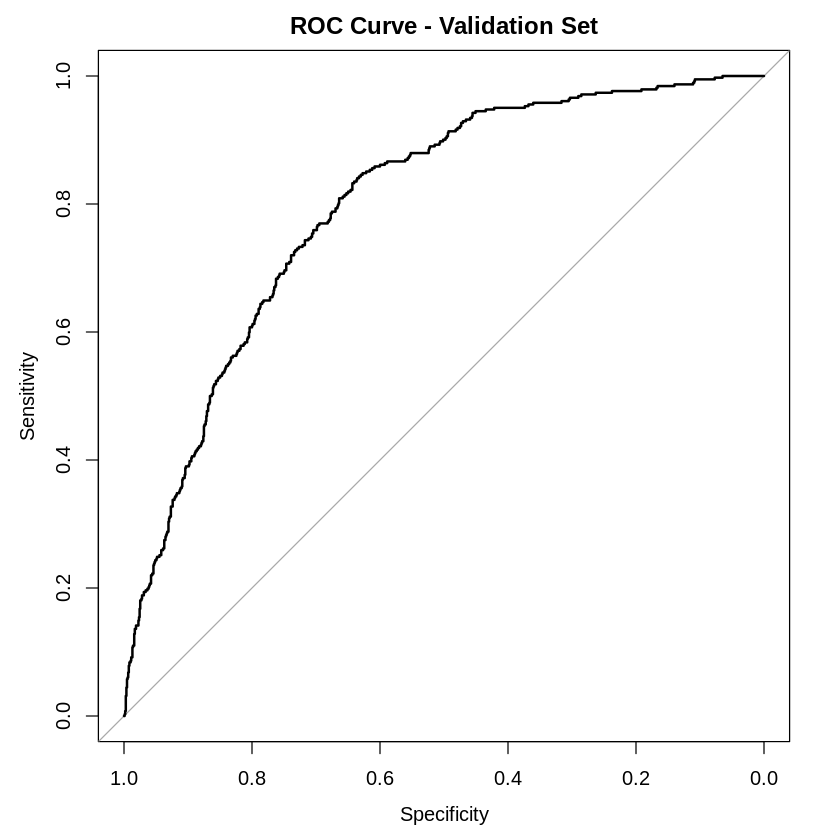

In [ ]:


# Create ROC curve and calculate AUC
roc_val <- roc(validate$CLAIM, pred_val)
plot(roc_val, main = "ROC Curve - Validation Set")


In [ ]:
auc(roc_val)


Area under the curve: 0.7975

In [ ]:
sensitivity(factor(validate$CLAIM, levels = c(0, 1)),
            factor(pred_test, levels = c(0, 1)))


ERROR: ignored

In [ ]:
library(DMwR)

ERROR: ignored

In [ ]:

# assuming your minority class is labeled "classA" and your majority class is labeled "classB"
minority_count <- sum(train$CLAIM == "classA")
oversampled_data <- ovun.sample(CLAIM ~ ., data = train, method = "over", seed = 42)


In [ ]:
# Extract the data frame from the oversampled_data object
oversampled_df <- oversampled_data$data

# Fit a logistic regression model to the oversampled training data
logit_over <- glm(CLAIM ~ ., data = oversampled_df, family = "binomial")

# View the model summary
summary(logit_over)



Call:
glm(formula = CLAIM ~ ., family = "binomial", data = oversampled_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5744  -0.8907   0.2053   0.8885   2.6291  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.655e+00  2.372e-01  -6.978 3.00e-12 ***
KIDSDRIV     4.641e-01  1.038e-01   4.469 7.84e-06 ***
AGE          3.031e-03  3.927e-03   0.772  0.44029    
HOMEKIDS     4.111e-01  8.116e-02   5.065 4.08e-07 ***
INCOME      -5.905e-06  8.380e-07  -7.047 1.83e-12 ***
HOMEOWN     -2.062e-01  7.312e-02  -2.819  0.00481 ** 
MSTATUS     -7.542e-01  7.236e-02 -10.423  < 2e-16 ***
GENDER       9.689e-02  8.178e-02   1.185  0.23608    
EDUCATION   -6.102e-01  8.300e-02  -7.352 1.96e-13 ***
TRAVTIME     1.733e-02  1.926e-03   9.001  < 2e-16 ***
CAR_USE      7.992e-01  6.654e-02  12.012  < 2e-16 ***
BLUEBOOK    -2.567e-05  3.951e-06  -6.497 8.21e-11 ***
TWC         -6.102e-02  7.247e-03  -8.420  < 2e-16 ***
RED_CAR     -5.312e-02  8

In [ ]:
# Predict on the test set using the logistic regression model
pred_test <- predict(logit_over, newdata = validate, type = "response")

# Create a binary prediction using a 0.5 threshold
binary_pred <- ifelse(pred_test > 0.5, 1, 0)

# Create a confusion matrix
conf_matrix <- table(validate$CLAIM, binary_pred)

# Print the confusion matrix
conf_matrix


   binary_pred
      0   1
  0 763 302
  1 100 282

In [ ]:
# Calculate the accuracy rate for the model on the test dataset
accuracy_test <- sum(diag(conf_matrix))/sum(conf_matrix)
round(accuracy_test,2)



[1] 0.72

In [ ]:
# Calculate the sensitivity for the model on the test dataset
sensitivity_test <- conf_matrix[2,2]/sum(conf_matrix[2,])
round(sensitivity_test,2)

[1] 0.74

In [ ]:
oversampled_data <- ROSE(CLAIM ~ ., data = train_no_na, seed = 1)$data
logistic_model <- glm(CLAIM ~ ., data = oversampled_data, family = "binomial")


In [ ]:


# Create a data frame with the predicted probabilities of the test set
predicted_probabilities <- predict(logistic_model, newdata = test, type = "response")
oversampled_df <- data.frame(probability = predicted_probabilities, CLAIM = test$CLAIM)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.81

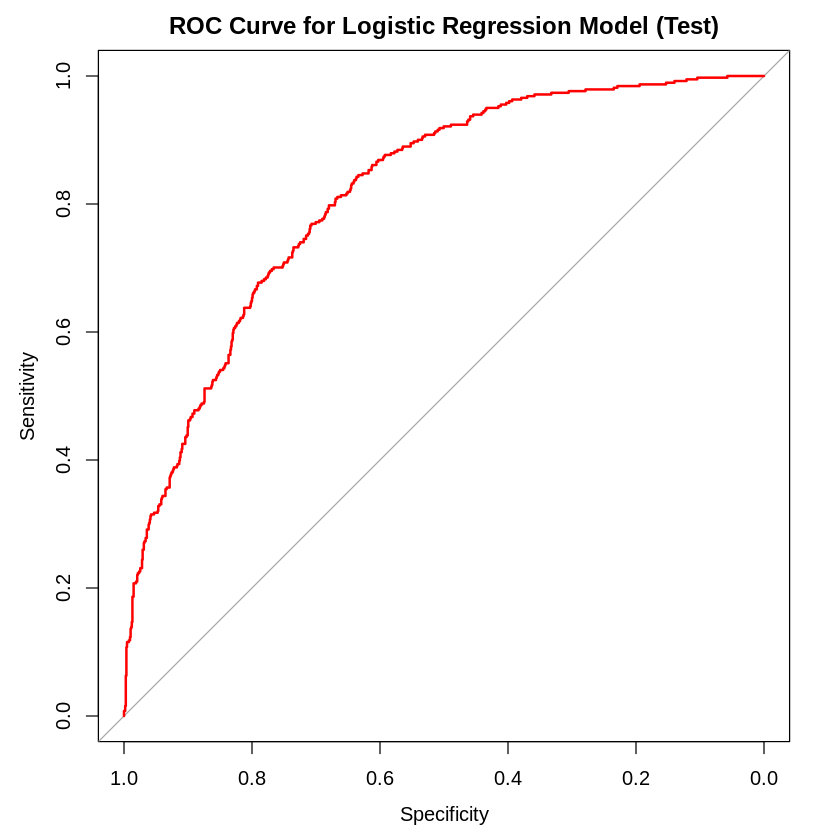

In [ ]:





# Create a ROC curve plot using the test dataset
roc_test <- roc(test$CLAIM, oversampled_df$probability)
plot(roc_test, main = "ROC Curve for Logistic Regression Model (Test)", col = "red")

# Calculate AUC for the ROC curve
round(auc(roc_test),2)


In [ ]:
# Load the data for the new customers
new_customers <- read.csv("insurance_predictions.csv")

In [ ]:
# Predict the probability scores for insurance claims for the new customers using the model
predictions <- predict(logistic_model, newdata = new_customers, type = "response")
predictions



1         2         3         4         5         6         7         8 
0.5588355 0.4819859 0.2411228 0.3098544 0.2104864 0.6078179 0.3681955 0.5156455 
        9        10 
0.4127969 0.4286205

In [ ]:
# Calculate the accuracy rate for the model on the test dataset
accuracy_test <- sum(diag(confusion_matrix_test))/sum(confusion_matrix_test)
accuracy_test

In [ ]:
pred_test <- predict(logit, newdata = test, type = "response")
results <- data.frame(Predicted = pred_test, Actual = test$CLAIM)
write.csv(results, "insurance_predicted.csv", row.names = FALSE)


In [ ]:
library(pROC)
auc(roc(validate$CLAIM, pred_test, plot = TRUE))



Setting levels: control = 0, case = 1



ERROR: ignored

In [ ]:
install.packages("googledrive")
install.packages("caret")
install.packages("ROCR")
install.packages("TTR")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("pROC")
install.packages("ROSE")

# create ROC curve plot
library(pROC)
library(caret)
library(ROCR)
library("googledrive")
library(TTR)
library(tidyverse)
library(ggplot2)
library(ROSE)
insurancedf <- read.csv("insurance.csv")

summary(insurancedf)

set.seed(42)
#60-20 20% partition#
Samples<-sample(seq(1,3),size=nrow (insurancedf),replace=TRUE, prob=c(0.6,0.2,0.2))
train<-insurancedf[Samples==1,]
validate<-insurancedf[Samples==2,]
test<-insurancedf[Samples==3,]

logit <- glm(CLAIM ~ ., data = train, family = "binomial")
logit

predicted.values <- predict(logit, newdata = validate, type = "response")

predicted.classes <- ifelse(predicted.values >= 0.5, 1, 0)

confusion_matrix<-table(predicted.classes, validate$CLAIM)
confusion_matrix

accuracy.rate <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
round(accuracy.rate,2)

sensitivity_test <- confusion_matrix[2,2]/sum(confusion_matrix[2,])
round(sensitivity_test,2)

# Create ROC curve and calculate AUC for validation set
roc_obj <- roc(validate$CLAIM, predicted.values)
ggroc(roc_obj, legacy.axes = TRUE)
round(auc(roc_obj),2)

# Create oversampled training subset using ROSE
oversampled.train <- ROSE(CLAIM ~ ., data = train, seed = 1)$data

# Count the number of observations in the "Yes" class in the oversampled training subset
sum(oversampled.train$CLAIM == "Yes")





ERROR: ignored

In [ ]:
# Load the insurance_predictions.csv file
insurance_pred <- read.csv("insurance_predictions.csv")


In [ ]:
insurance_pred

In [ ]:
pred <- predict(logit, newdata = insurance_pred, type = "response")

In [ ]:
pred

1          2          3          4          5          6          7 
0.37924651 0.24512033 0.08621149 0.10943031 0.06761655 0.44436245 0.20907465 
         8          9         10 
0.35584673 0.23543774 0.21958557

In [ ]:
new_customers <- read.csv("insurance_predictions.csv")
new_customers

KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,CLAIM
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,42,1,32797,1,1,1,1,63,0,21690,1,0,0,0,1,14,1,NA
0,47,0,44705,1,1,1,1,50,0,12840,1,0,1,0,0,10,1,NA
0,52,0,68992,1,0,1,1,36,1,15120,1,0,0,0,1,10,0,NA
0,43,0,132561,1,0,0,1,8,1,30150,16,0,1,0,0,1,1,NA
0,66,1,96830,1,1,0,1,23,0,11180,7,0,0,0,0,16,1,NA
0,52,0,64014,1,1,0,0,33,1,7900,4,1,1,0,1,5,1,NA
1,61,1,41857,1,1,1,1,35,0,20870,1,0,0,0,0,21,1,NA
0,41,1,126468,0,0,1,1,34,1,32690,3,0,0,0,1,18,1,NA
1,40,1,75516,1,1,1,0,53,1,13050,5,0,0,1,0,6,0,NA


In [ ]:
# Load the insurance_predictions.csv file
insurance_pred <- read.csv("insurance_predictions.csv")

# Select the row corresponding to customer #1
customer_1 <- insurance_pred[1, ]

# Make a prediction for customer #1
pred_customer_1 <- predict(logit, newdata = customer_1, type = "response")


In [ ]:
pred_customer_1

1 
0.3766789

In [ ]:
# Convert categorical variables to factors with levels and labels
new_customers$CLAIM <- factor(new_customers$CLAIM, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$KIDSDRIV <- factor(new_customers$KIDSDRIV, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$AGE <- factor(new_customers$AGE)
new_customers$HOMEKIDS <- factor(new_customers$HOMEKIDS, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$INCOME <- factor(new_customers$INCOME)
new_customers$HOMEOWN <- factor(new_customers$HOMEOWN, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$MSTATUS <- factor(new_customers$MSTATUS, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$GENDER <- factor(new_customers$GENDER, levels = c(0, 1), labels = c("Male", "Female"))
new_customers$EDUCATION <- factor(new_customers$EDUCATION, levels = c(0, 1), labels = c("High School only", "College or beyond"))
new_customers$TRAVTIME <- factor(new_customers$TRAVTIME)
new_customers$CAR_USE <- factor(new_customers$CAR_USE, levels = c(0, 1), labels = c("Private", "Commercial"))
new_customers$BLUEBOOK <- factor(new_customers$BLUEBOOK)
new_customers$TWC <- factor(new_customers$TWC)
new_customers$RED_CAR <- factor(new_customers$RED_CAR, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$CLM_BEF <- factor(new_customers$CLM_BEF, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$REVOKED <- factor(new_customers$REVOKED, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$MVR_PTS <- factor(new_customers$MVR_PTS, levels = c(0, 1), labels = c("No", "Yes"))
new_customers$CAR_AGE <- factor(new_customers$CAR_AGE)
new_customers$URBANICITY <- factor(new_customers$URBANICITY, levels = c(0, 1), labels = c("Rural", "Urban"))
new_customers

KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,CLAIM
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
NA,42,NA,32797,NA,NA,NA,NA,63,NA,21690,1,NA,NA,NA,NA,14,NA,NA
NA,47,NA,44705,NA,NA,NA,NA,50,NA,12840,1,NA,NA,NA,NA,10,NA,NA
NA,52,NA,68992,NA,NA,NA,NA,36,NA,15120,1,NA,NA,NA,NA,10,NA,NA
NA,43,NA,132561,NA,NA,NA,NA,8,NA,30150,16,NA,NA,NA,NA,1,NA,NA
NA,66,NA,96830,NA,NA,NA,NA,23,NA,11180,7,NA,NA,NA,NA,16,NA,NA
NA,52,NA,64014,NA,NA,NA,NA,33,NA,7900,4,NA,NA,NA,NA,5,NA,NA
NA,61,NA,41857,NA,NA,NA,NA,35,NA,20870,1,NA,NA,NA,NA,21,NA,NA
NA,41,NA,126468,NA,NA,NA,NA,34,NA,32690,3,NA,NA,NA,NA,18,NA,NA
NA,40,NA,75516,NA,NA,NA,NA,53,NA,13050,5,NA,NA,NA,NA,6,NA,NA


In [ ]:
#read new dataset into R




# make predictions for new data (for which loan default is unknown)
lrprobsnew <- predict(lrOver, newdata = new_customers , type = "response")

#Attach probability scores to new_customers dataframe
new_customers <- cbind(new_customers, Probabilities=lrprobsnew)
View(new_customers)


ERROR: ignored

In [ ]:


#Step 1: Generate summary statistics for the variables in the insurance.csv dataset.
# Load the dataset
insurance <- read.csv("insurance.csv")

# View the dataset
head(insurance)

# Check the structure of the dataset
str(insurance)

# Generate summary statistics for the variables in the dataset
summary(insurance)
#Step 2: Partition the dataset into a training, validation, and test set, using a 60%-20%-20% split.
# Set seed for reproducibility
set.seed(42)

# Partition the data into training, validation, and test sets
library(caTools)
split <- sample.split(insurance$CLAIM, SplitRatio = 0.6)
train <- subset(insurance, split == TRUE)
other <- subset(insurance, split == FALSE)
split2 <- sample.split(other$CLAIM, SplitRatio = 0.5)
validate <- subset(other, split2 == TRUE)
test <- subset(other, split2 == FALSE)

Step 3: Conduct a logistic regression analysis using the training data frame with CLAIM as the outcome variable and all the other variables in the dataset as predictor variables.
# Fit a logistic regression model to the training data
logit <- glm(CLAIM ~ ., data = train, family = "binomial")

# View the model summary
summary(logit)

Step 4: Using the model you fitted in Step (3) and the validation data frame you created in Step (2), create a confusion matrix to assess the accuracy of the logistic regression model.
# Predict on validation data
pred_val <- predict(logit, newdata = validate, type = "response")

# Create confusion matrix
table(validate$CLAIM, pred_val > 0.5)

Step 5: Again using the model you fitted in Step (3) and the validation data frame, create an ROC curve plot and calculate the AUC.
# Load the pROC package
library(pROC)

# Create ROC curve and calculate AUC
roc_val <- roc(validate$CLAIM, pred_val)
plot(roc_val, main = "ROC Curve - Validation Set")
auc(roc_val)

Step 6: Using the training set you generated in Step (2), create a new training subset using the oversampling method.
# Load the ROSE package
library(ROSE)

# Oversample the minority class in the training data
train_over <- ovun.sample(CLAIM ~ ., data = train, method = "over", N = nrow(train) / 2, seed = 42)$data

Step 7: Conduct a logistic regression analysis using the new oversampled training subset with CLAIM as the outcome variable and all the other variables in the dataset as predictor variables.
# Fit a logistic regression model to the oversampled training data
logit_over <- glm(CLAIM ~ ., data = train_over, family = "binomial")

# View the model summary
summary(logit_over)


In [ ]:
insurancedf

CLAIM,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,60,0,67349,0,0,0,1,14,0,14230,11,1,1,0,1,18,1
0,0,43,0,91449,1,0,0,0,22,1,14940,1,1,0,0,0,1,1
0,0,35,1,16039,1,1,1,0,5,0,4010,4,0,1,0,1,10,1
0,0,50,0,114986,1,1,1,1,36,0,18000,1,0,1,1,1,17,1
1,0,34,1,125301,0,0,1,1,46,1,17430,1,0,0,0,0,7,1
0,0,54,0,18755,0,1,1,0,33,0,8780,1,0,0,0,0,1,1
1,1,37,1,107961,1,1,0,1,44,1,16970,1,1,1,1,1,7,1
1,0,34,0,62978,0,0,1,1,34,0,11200,1,0,0,0,0,1,1
0,0,50,0,106952,0,0,0,1,48,1,18510,7,0,0,0,1,17,0


In [ ]:
# Convert categorical variables to factors with levels and labels
insurancedf$CLAIM <- factor(insurancedf$CLAIM, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$KIDSDRIV <- factor(insurancedf$KIDSDRIV, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$AGE <- factor(insurancedf$AGE)
insurancedf$HOMEKIDS <- factor(insurancedf$HOMEKIDS, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$INCOME <- factor(insurancedf$INCOME)
insurancedf$HOMEOWN <- factor(insurancedf$HOMEOWN, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$MSTATUS <- factor(insurancedf$MSTATUS, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$GENDER <- factor(insurancedf$GENDER, levels = c(0, 1), labels = c("Male", "Female"))
insurancedf$EDUCATION <- factor(insurancedf$EDUCATION, levels = c(0, 1), labels = c("High School only", "College or beyond"))
insurancedf$TRAVTIME <- factor(insurancedf$TRAVTIME)
insurancedf$CAR_USE <- factor(insurancedf$CAR_USE, levels = c(0, 1), labels = c("Private", "Commercial"))
insurancedf$BLUEBOOK <- factor(insurancedf$BLUEBOOK)
insurancedf$TWC <- factor(insurancedf$TWC)
insurancedf$RED_CAR <- factor(insurancedf$RED_CAR, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$CLM_BEF <- factor(insurancedf$CLM_BEF, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$REVOKED <- factor(insurancedf$REVOKED, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$MVR_PTS <- factor(insurancedf$MVR_PTS, levels = c(0, 1), labels = c("No", "Yes"))
insurancedf$CAR_AGE <- factor(insurancedf$CAR_AGE)
insurancedf$URBANICITY <- factor(insurancedf$URBANICITY, levels = c(0, 1), labels = c("Rural", "Urban"))


In [ ]:

#read dataset into R
View(insurancedf)

CLAIM,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
No,No,60,No,67349,No,No,Male,College or beyond,14,Private,14230,11,Yes,Yes,No,Yes,18,Urban
No,No,43,No,91449,Yes,No,Male,High School only,22,Commercial,14940,1,Yes,No,No,No,1,Urban
No,No,35,Yes,16039,Yes,Yes,Female,High School only,5,Private,4010,4,No,Yes,No,Yes,10,Urban
No,No,50,No,114986,Yes,Yes,Female,College or beyond,36,Private,18000,1,No,Yes,Yes,Yes,17,Urban
Yes,No,34,Yes,125301,No,No,Female,College or beyond,46,Commercial,17430,1,No,No,No,No,7,Urban
No,No,54,No,18755,No,Yes,Female,High School only,33,Private,8780,1,No,No,No,No,1,Urban
Yes,Yes,37,Yes,107961,Yes,Yes,Male,College or beyond,44,Commercial,16970,1,Yes,Yes,Yes,Yes,7,Urban
Yes,No,34,No,62978,No,No,Female,College or beyond,34,Private,11200,1,No,No,No,No,1,Urban
No,No,50,No,106952,No,No,Male,College or beyond,48,Commercial,18510,7,No,No,No,Yes,17,Rural


In [ ]:
#check for missing data
sum(is.na(insurancedf))

[1] 0

In [ ]:
#generate summary statistics for all variables in dataframe
summary(insurancedf)

 CLAIM      KIDSDRIV        AGE       HOMEKIDS       INCOME     HOMEOWN   
 No :5324   No :6372   46     : 347   No :4684   0      : 570   No :2436  
 Yes:1908   Yes: 860   45     : 338   Yes:2548   26840  :   4   Yes:4796  
                       48     : 323              48509  :   4             
                       47     : 316              61790  :   4             
                       44     : 307              6607   :   3             
                       43     : 300              17398  :   3             
                       (Other):5301              (Other):6644             
 MSTATUS       GENDER                 EDUCATION       TRAVTIME   
 No :2908   Male  :3352   High School only :3140   5      : 283  
 Yes:4324   Female:3880   College or beyond:4092   30     : 196  
                                                   35     : 193  
                                                   36     : 191  
                                                   25     : 188  
    

In [ ]:
#set seed so the random sample is reproducible
set.seed(42)

In [ ]:
#Partition the Optiva dataset into a training, validation and test set
Samples<-sample(seq(1,3),size=nrow(insurancedf),replace=TRUE,prob=c(0.6,0.2,0.2))
Train<-insurancedf[Samples==1,]
Validate<-insurancedf[Samples==2,]
Test<-insurancedf[Samples==3,]

In [ ]:
#View descriptive statistics for each dataframe
summary(Train)
summary(Validate)


 CLAIM      KIDSDRIV        AGE       HOMEKIDS       INCOME     HOMEOWN   
 No :3163   No :3808   46     : 205   No :2777   0      : 349   No :1439  
 Yes:1155   Yes: 510   45     : 202   Yes:1541   6607   :   3   Yes:2879  
                       47     : 199              20887  :   3             
                       48     : 198              23157  :   3             
                       41     : 184              48509  :   3             
                       43     : 182              82398  :   3             
                       (Other):3148              (Other):3954             
 MSTATUS       GENDER                 EDUCATION       TRAVTIME   
 No :1715   Male  :1989   High School only :1877   5      : 176  
 Yes:2603   Female:2329   College or beyond:2441   30     : 121  
                                                   33     : 117  
                                                   35     : 116  
                                                   29     : 110  
    

 CLAIM      KIDSDRIV        AGE       HOMEKIDS      INCOME     HOMEOWN  
 No :1109   No :1279   48     :  71   No :957   0      : 101   No :488  
 Yes: 365   Yes: 195   44     :  70   Yes:517   11047  :   2   Yes:986  
                       42     :  68             18631  :   2            
                       46     :  66             23655  :   2            
                       50     :  64             35296  :   2            
                       40     :  63             44977  :   2            
                       (Other):1072             (Other):1363            
 MSTATUS      GENDER                EDUCATION      TRAVTIME          CAR_USE   
 No :585   Male  :696   High School only :648   5      :  55   Private   :919  
 Yes:889   Female:778   College or beyond:826   36     :  49   Commercial:555  
                                                25     :  47                   
                                                35     :  45                   
                

In [ ]:
summary(Test)

 CLAIM      KIDSDRIV        AGE       HOMEKIDS      INCOME     HOMEOWN  
 No :1052   No :1285   46     :  76   No :950   0      : 120   No :509  
 Yes: 388   Yes: 155   45     :  75   Yes:490   13148  :   2   Yes:931  
                       44     :  70             17398  :   2            
                       43     :  66             20852  :   2            
                       51     :  65             22654  :   2            
                       47     :  58             23111  :   2            
                       (Other):1030             (Other):1310            
 MSTATUS      GENDER                EDUCATION      TRAVTIME          CAR_USE   
 No :608   Male  :667   High School only :615   5      :  52   Private   :916  
 Yes:832   Female:773   College or beyond:825   29     :  44   Commercial:524  
                                                27     :  43                   
                                                32     :  42                   
                

In [ ]:
length(Validate$CLAIM)
length(pred_val > 0.5)


[1] 1474

[1] 1447

In [ ]:
#Create a data frame with only the predictor variables by removing
#column 1 (claim)
xsdf<-Train[c(-1)]
View(xsdf)


,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
3,No,35,Yes,16039,Yes,Yes,Female,High School only,5,Private,4010,4,No,Yes,No,Yes,10,Urban
6,No,54,No,18755,No,Yes,Female,High School only,33,Private,8780,1,No,No,No,No,1,Urban
8,No,34,No,62978,No,No,Female,College or beyond,34,Private,11200,1,No,No,No,No,1,Urban
11,No,43,No,52642,Yes,Yes,Female,College or beyond,36,Private,22420,7,No,No,No,No,1,Rural
14,No,45,No,0,Yes,Yes,Female,High School only,48,Private,6000,1,No,No,No,Yes,5,Urban
15,No,39,Yes,51884,Yes,No,Female,College or beyond,43,Private,10590,6,No,No,No,No,13,Rural
18,No,31,Yes,18903,Yes,Yes,Female,High School only,48,Private,17330,4,No,No,No,No,7,Urban
19,No,28,Yes,44077,Yes,Yes,Female,High School only,29,Commercial,8710,6,No,Yes,No,No,1,Urban
20,No,43,No,37214,No,Yes,Male,High School only,52,Commercial,26560,1,Yes,No,No,Yes,1,Urban


In [ ]:
#Create an undersampled training subset
set.seed(42)
undersample<-downSample(x=xsdf, y=Train$CLAIM, yname = "CLAIM")
table(undersample$CLAIM)


  No  Yes 
1155 1155 

In [ ]:
#Create an oversampled training subset
set.seed(42)
oversample<-upSample(x=xsdf, y=Train$CLAIM , yname = "CLAIM")

table(oversample$CLAIM )


  No  Yes 
3163 3163 

In [ ]:
dim(Train)


[1] 4318   19

In [ ]:
# Fit a logistic regression model to the training data
logit <- glm(CLAIM ~ ., data = train, family = "binomial")

# View the model summary
summary(logit)


ERROR: ignored

In [ ]:
# Convert CLAIM to binary factor
oversample$CLAIM <- as.factor(oversample$CLAIM)

In [ ]:

# Remove variables AGE, TWC, and TRAVTIME
input_vars <- setdiff(names(oversample), c("AGE", "TWC", "TRAVTIME", "CLAIM"))

In [ ]:
# Fit logistic regression model with remaining variables
lrOver <- glm(CLAIM ~ ., data = oversample[, c(input_vars, "CLAIM")], family = binomial(link = "logit"))

ERROR: ignored

In [ ]:
sapply(oversample, function(x) if (is.factor(x)) length(levels(x)) else 0)


KIDSDRIV        AGE   HOMEKIDS     INCOME    HOMEOWN    MSTATUS     GENDER 
         2          0          2          1          2          2          2 
 EDUCATION   TRAVTIME    CAR_USE   BLUEBOOK        TWC    RED_CAR    CLM_BEF 
         2          0          2          0          1          2          2 
   REVOKED    MVR_PTS    CAR_AGE URBANICITY      CLAIM 
         2          2         30          2          2

In [ ]:
# specify the contrasts for the factor variables in the oversample dataframe
contrasts_df <- lapply(oversample[, sapply(oversample, is.factor)], contrasts)

# fit logistic regression model with explicit contrasts
lrOver <- glm(CLAIM ~ ., data = oversample, family = binomial(link = "logit"), contrasts = contrasts_df)

# check model summary
summary(lrOver)


ERROR: ignored

In [ ]:
lapply(oversample[, sapply(oversample, function(x) is.factor(x) && length(levels(x)) > 1)], contrasts)


,Yes
No,0
Yes,1
,Yes
No,0
Yes,1
,Yes
No,0
Yes,1
,Yes
No,0


In [ ]:
# specify the contrasts for the factor variables in the oversample dataframe
contrasts_df <- lapply(oversample[, sapply(oversample, is.factor)], contrasts)

# fit logistic regression model with explicit contrasts
lrOver <- glm(CLAIM ~ ., data = oversample, family = binomial(link = "logit"), contrasts = contrasts_df)

# check model summary
summary(lrOver)


ERROR: ignored

In [ ]:

# Check model summary
summary(lrOver)


ERROR: ignored

In [ ]:
# fit logistic regression model on the LoanDefault outcome variable
# using specified input variables with the oversample dataframe
lrOver <- glm(CLAIM ~ .-AGE -TWC - TRAVTIME, data = oversample, family = binomial(link = "logit"))


ERROR: ignored

In [ ]:
sapply(oversample, function(x) if(is.factor(x)) nlevels(x) else NA)


KIDSDRIV        AGE   HOMEKIDS     INCOME    HOMEOWN    MSTATUS     GENDER 
         2          0          2          1          2          2          2 
 EDUCATION   TRAVTIME    CAR_USE   BLUEBOOK        TWC    RED_CAR    CLM_BEF 
         2          0          2          0          1          2          2 
   REVOKED    MVR_PTS    CAR_AGE URBANICITY      CLAIM 
         2          2         30          2          2

In [ ]:
summary(undersample)


 KIDSDRIV     AGE       HOMEKIDS    INCOME     HOMEOWN    MSTATUS   
 No :1995   NA's:2310   No :1404   No  : 219   No : 831   No : 982  
 Yes: 315               Yes: 906   NA's:2091   Yes:1479   Yes:1328  
                                                                    
                                                                    
                                                                    
                                                                    
                                                                    
    GENDER                 EDUCATION    TRAVTIME          CAR_USE    
 Male  :   0   High School only :1087   NA's:2310   Private   :1353  
 Female:   0   College or beyond:1223               Commercial: 957  
 NA's  :2310                                                         
                                                                     
                                                                     
                            

In [ ]:
# fit logistic regression model on the LoanDefault outcome variable
# using specified input variables with the oversample dataframe
lrOver <- glm(LoanDefault ~ . - CustomerID, data = oversample,
              family = binomial(link = "logit"))

In [ ]:
summary(lrUnder)

ERROR: ignored

In [ ]:





# fit logistic regression model on the LoanDefault outcome variable
# using specified input variables with the undersample dataframe

#Logistic regression is part of the general linear model family, so the R
#function is glm.


# model summary


# fit logistic regression model on the LoanDefault outcome variable
# using specified input variables with the oversample dataframe
lrOver <- glm(LoanDefault ~ . - CustomerID, data = oversample,
              family = binomial(link = "logit"))

# model summary
summary(lrOver)

# fit logistic regression model on the LoanDefault outcome variable
# using specified input variables with the rose dataframe

lrrose <- glm(LoanDefault ~ . - CustomerID, data = rose,
              family = binomial(link = "logit"))

# model summary
summary(lrrose)


#exponentiate the regression coefficients from the logistic regression model
#using the oversample dataframe
exp(coef(lrOver))


#Steps to create a confusion matrix

#First using logistic regression model built on oversampled training subset

# obtain probability of defaulting for each observation in validation set
lrprobsO <- predict(lrOver, newdata = Validate, type = "response")

#Attach probability scores to Validate dataframe
Validate <- cbind(Validate, Probabilities=lrprobsO)

# obtain predicted class for each observation in validation set using threshold of 0.5
lrclassO <- as.factor(ifelse(lrprobsO > 0.5, "Yes","No"))

#Attach predicted class to Validate dataframe
Validate <- cbind(Validate, PredClass=lrclassO)

#Create a confusion matrix using "Yes" as the positive class
confusionMatrix(lrclassO, Validate$LoanDefault, positive = "Yes" )


#Steps to create a confusion matrix

#Using logistic regression model built on undersampled training subset

# obtain probability of positive class for each observation in validation set
lrprobsU <- predict(lrUnder, newdata = Validate, type = "response")

# obtain predicted class for each observation in validation set using threshold of 0.5
lrclassU <- as.factor(ifelse(lrprobsU > 0.5, "Yes","No"))

# output performance metrics using "Yes" as the positive class
confusionMatrix(lrclassU, Validate$LoanDefault, positive = "Yes" )


#Steps to create a confusion matrix

#First using logistic regression model built on ROSE training subset


# obtain probability of positive class for each observation in validation set
lrprobsR <- predict(lrrose, newdata = Validate, type = "response")

# obtain predicted class for each observation in validation set using threshold of 0.5
lrclassR <- as.factor(ifelse(lrprobsR > 0.5, "Yes","No"))

# output performance metrics using "Yes" as the positive class
confusionMatrix(lrclassR, Validate$LoanDefault, positive = "Yes" )


#change the probability cutoff to 0.6, still using the model built on ROSE subset

# obtain probability of positive class for each observation in validation set
lrprobsR2 <- predict(lrrose, newdata = Validate, type = "response")

# obtain predicted class for each observation in validation set using threshold of 0.5
lrclassR2 <- as.factor(ifelse(lrprobsR2 > 0.6, "Yes","No"))

# output performance metrics using "Yes" as the positive class
confusionMatrix(lrclassR2, Validate$LoanDefault, positive = "Yes" )



#Plot ROC Curve for model from oversampled training set

#create a prediction object to use for the ROC Curve
predROC <- prediction(lrprobsO, Validate$LoanDefault)

#create a performance object to use for the ROC Curve
perfROC <- performance(predROC,"tpr", "fpr")

#plot the ROC Curve
plot(perfROC)
abline(a=0, b= 1)

# compute AUC
performance(predROC, measure="auc")@y.values[[1]]


#Plot ROC Curve for model from undersampled training set

#create a prediction object to use for the ROC Curve
predROCU <- prediction(lrprobsU, Validate$LoanDefault)

#create a performance object to use for the ROC Curve
perfROCU <- performance(predROCU,"tpr", "fpr")

#plot the ROC Curve
plot(perfROCU)
abline(a=0, b= 1)

# compute AUC
performance(predROCU, measure="auc")@y.values[[1]]


#Plot ROC Curve for model from ROSE training set

#create a prediction object to use for the ROC Curve
predROCR <- prediction(lrprobsR, Validate$LoanDefault)

#create a performance object to use for the ROC Curve
perfROCR <- performance(predROCR,"tpr", "fpr")

#plot the ROC Curve
plot(perfROCR)
abline(a=0, b= 1)

# compute AUC
performance(predROCR, measure="auc")@y.values[[1]]


# Evaluate accuracy of the model built using the oversampled training set
# applied to the test set


# obtain probability of defaulting for each observation in test set
lrprobstest <- predict(lrOver, newdata = Test, type = "response")

# obtain predicted class for each observation in test set using threshold of 0.5
lrclasstest <- as.factor(ifelse(lrprobstest > 0.5, "Yes","No"))

#Create a confusion matrix using "Yes" as the positive class
confusionMatrix(lrclasstest, Test$LoanDefault, positive = "Yes" )


#Plot ROC Curve for model from oversampled training set using Test set

#create a prediction object to use for the ROC Curve
predROCtest <- prediction(lrprobstest, Test$LoanDefault)

#create a performance object to use for the ROC Curve
perfROCtest <- performance(predROCtest,"tpr", "fpr")

#plot the ROC Curve
plot(perfROCtest)
abline(a=0, b= 1)

# compute AUC
performance(predROCtest, measure="auc")@y.values[[1]]


#predict probability of default for new customers

#read new dataset into R
new_customers <- read.csv("OptivaNewData.csv")
View(new_customers)

#Convert categorical variables to factors with levels and labels
new_customers$Entrepreneur<-factor(new_customers$Entrepreneur,levels = c(0,1),labels = c("No","Yes"))
new_customers$Unemployed<-factor(new_customers$Unemployed,levels = c(0,1),labels = c("No","Yes"))
new_customers$Married<-factor(new_customers$Married,levels = c(0,1),labels = c("No","Yes"))
new_customers$Divorced<-factor(new_customers$Divorced,levels = c(0,1),labels = c("No","Yes"))
new_customers$HighSchool<-factor(new_customers$HighSchool,levels = c(0,1),labels = c("No","Yes"))
new_customers$College<-factor(new_customers$College,levels = c(0,1),labels = c("No","Yes"))

# make predictions for new data (for which loan default is unknown)
lrprobsnew <- predict(lrOver, newdata = new_customers , type = "response")

#Attach probability scores to new_customers dataframe
new_customers <- cbind(new_customers, Probabilities=lrprobsnew)
View(new_customers)






In [ ]:


# View the dataset
head(insurancedf)

# Check the structure of the dataset
str(insurancedf)

# Generate summary statistics for the variables in the dataset
summary(insurancedf)
#Step 2: Partition the dataset into a training, validation, and test set, using a 60%-20%-20% split.
# Set seed for reproducibility
set.seed(42)

# Partition the data into training, validation, and test sets
library(caTools)
split <- sample.split(insurancedf$CLAIM, SplitRatio = 0.6)
train <- subset(insurancedf, split == TRUE)
other <- subset(insurancedf, split == FALSE)
split2 <- sample.split(other$CLAIM, SplitRatio = 0.5)
validate <- subset(other, split2 == TRUE)
test <- subset(other, split2 == FALSE)
# Remove rows with missing values from the training dataset
train_no_na <- na.omit(train)


,CLAIM,KIDSDRIV,AGE,HOMEKIDS,INCOME,HOMEOWN,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TWC,RED_CAR,CLM_BEF,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,No,No,NA,No,NA,No,No,Male,College or beyond,NA,Private,NA,NA,Yes,Yes,No,Yes,18,Urban
2,No,No,NA,No,NA,Yes,No,Male,High School only,NA,Commercial,NA,Yes,Yes,No,No,No,1,Urban
3,No,No,NA,Yes,NA,Yes,Yes,Female,High School only,NA,Private,NA,NA,No,Yes,No,Yes,10,Urban
4,No,No,NA,No,NA,Yes,Yes,Female,College or beyond,NA,Private,NA,Yes,No,Yes,Yes,Yes,17,Urban
5,Yes,No,NA,Yes,NA,No,No,Female,College or beyond,NA,Commercial,NA,Yes,No,No,No,No,7,Urban
6,No,No,NA,No,NA,No,Yes,Female,High School only,NA,Private,NA,Yes,No,No,No,No,1,Urban


'data.frame':	7232 obs. of  19 variables:
 $ CLAIM     : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 2 2 1 2 ...
 $ KIDSDRIV  : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 1 ...
 $ AGE       : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ HOMEKIDS  : Factor w/ 2 levels "No","Yes": 1 1 2 1 2 1 2 1 1 1 ...
 $ INCOME    : Factor w/ 1 level "No": NA NA NA NA NA NA NA NA NA NA ...
 $ HOMEOWN   : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 2 1 1 1 ...
 $ MSTATUS   : Factor w/ 2 levels "No","Yes": 1 1 2 2 1 2 2 1 1 1 ...
 $ GENDER    : Factor w/ 2 levels "Male","Female": 1 1 2 2 2 2 1 2 1 2 ...
 $ EDUCATION : Factor w/ 2 levels "High School only",..: 2 1 1 2 2 1 2 2 2 2 ...
 $ TRAVTIME  : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ CAR_USE   : Factor w/ 2 levels "Private","Commercial": 1 2 1 1 2 1 2 1 2 1 ...
 $ BLUEBOOK  : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ TWC       : Factor w/ 1 level "Yes": NA 1 NA 1 1 1 1 1 NA 1 ...
 $ RED_CAR   : Factor w

 CLAIM      KIDSDRIV     AGE       HOMEKIDS    INCOME     HOMEOWN    MSTATUS   
 No :5324   No :6372   NA's:7232   No :4684   No  : 570   No :2436   No :2908  
 Yes:1908   Yes: 860               Yes:2548   NA's:6662   Yes:4796   Yes:4324  
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
    GENDER                 EDUCATION    TRAVTIME          CAR_USE    
 Male  :3352   High School only :3140   NA's:7232   Private   :4535  
 Female:3880   College or beyond:4092               Commercial:2697  
                                                                     
                                                                     
          

In [ ]:
# Oversample the minority class in the training data
train_over <- ovun.sample(CLAIM ~ .-AGE, data = train_no_na, method = "over", N = nrow(train_no_na) / 2, seed = 42)$data

Warning message in (function (formula, data, method, subset, na.action, N, p = 0.5, :
“Transformations of variables are not allowed.
 New data have been generated by using non-transformed variables.
 ”


ERROR: ignored

In [ ]:
#Step 3: Conduct a logistic regression analysis using the training data frame with CLAIM as the outcome variable and all the other variables in the dataset as predictor variables.
# Fit a logistic regression model to the training data
logit <- glm(CLAIM ~ ., data = train, family = "binomial")

ERROR: ignored

In [ ]:





# View the model summary
summary(logit)

#Step 4: Using the model you fitted in Step (3) and the validation data frame you created in Step (2), create a confusion matrix to assess the accuracy of the logistic regression model.
# Predict on validation data
pred_val <- predict(logit, newdata = validate, type = "response")

# Create confusion matrix
table(validate$CLAIM, pred_val > 0.5)

#Step 5: Again using the model you fitted in Step (3) and the validation data frame, create an ROC curve plot and calculate the AUC.
# Load the pROC package
library(pROC)

# Create ROC curve and calculate AUC
roc_val <- roc(validate$CLAIM, pred_val)
plot(roc_val, main = "ROC Curve - Validation Set")
auc(roc_val)

#Step 6: Using the training set you generated in Step (2), create a new training subset using the oversampling method.
# Load the ROSE package
library(ROSE)

# Oversample the minority class in the training data
train_over <- ovun.sample(CLAIM ~ .-AGE, data = train, method = "over", N = nrow(train) / 2, seed = 42)$data

#Step 7: Conduct a logistic regression analysis using the new oversampled training subset with CLAIM as the outcome variable and all the other variables in the dataset as predictor variables.
# Fit a logistic regression model to the oversampled training data
logit_over <- glm(CLAIM ~ ., data = train_over, family = "binomial")

# View the model summary
summary(logit_over)


In [ ]:
insurance <- read.csv("insurance.csv")
# Calculate summary statistics for all variables
summary(insurance)


     CLAIM           KIDSDRIV           AGE           HOMEKIDS     
 Min.   :0.0000   Min.   :0.0000   Min.   :16.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:39.00   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :45.00   Median :0.0000  
 Mean   :0.2638   Mean   :0.1189   Mean   :44.78   Mean   :0.3523  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:51.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :81.00   Max.   :1.0000  
     INCOME          HOMEOWN          MSTATUS           GENDER      
 Min.   :     0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 28117   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 54009   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   : 61912   Mean   :0.6632   Mean   :0.5979   Mean   :0.5365  
 3rd Qu.: 86166   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :367030   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   EDUCATION         TRAVTIME         CAR

In [ ]:

# Set seed value to 42
set.seed(42)

# Determine the number of observations in the dataset
n_obs <- nrow(insurance)

# Determine the number of observations in the training, validation, and test sets
n_train <- round(0.6 * n_obs)
n_val <- round(0.2 * n_obs)
n_test <- n_obs - n_train - n_val

# Create a vector of randomly permuted observation indices
permuted_indices <- sample(n_obs)

# Use the randomly permuted indices to assign observations to each set
train_set <- insurance[permuted_indices[1:n_train], ]
val_set <- insurance[permuted_indices[(n_train + 1):(n_train + n_val)], ]
test_set <- insurance[permuted_indices[(n_train + n_val + 1):(n_train + n_val + n_test)], ]

In [ ]:
logit <- glm(CLAIM ~ ., data = train, family = "binomial")


ERROR: ignored

In [ ]:
# View the dataset

insurancedf <- read.csv("insurance.csv")

# Generate summary statistics for the variables in the dataset

summary(insurancedf)

#Step 2: Partition the dataset into a training, validation, and test set, using a 60%-20%-20% split.


     CLAIM           KIDSDRIV           AGE           HOMEKIDS     
 Min.   :0.0000   Min.   :0.0000   Min.   :16.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:39.00   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :45.00   Median :0.0000  
 Mean   :0.2638   Mean   :0.1189   Mean   :44.78   Mean   :0.3523  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:51.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :81.00   Max.   :1.0000  
     INCOME          HOMEOWN          MSTATUS           GENDER      
 Min.   :     0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 28117   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 54009   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   : 61912   Mean   :0.6632   Mean   :0.5979   Mean   :0.5365  
 3rd Qu.: 86166   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :367030   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   EDUCATION         TRAVTIME         CAR

In [ ]:

# Set seed for reproducibility

set.seed(42)


# Partition the data into training, validation, and test sets

library(caTools)

split <- sample.split(insurancedf$CLAIM, SplitRatio = 0.6)

train <- subset(insurancedf, split == TRUE)

other <- subset(insurancedf, split == FALSE)

split2 <- sample.split(other$CLAIM, SplitRatio = 0.5)

validate <- subset(other, split2 == TRUE)

test <- subset(other, split2 == FALSE)

# Remove rows with missing values from the training dataset

train_no_na <- na.omit(train)

In [ ]:
# Fit logistic regression model to training data
model <- glm(CLAIM ~ ., data = train_no_na, family = binomial)


In [ ]:

# View model summary
summary(model)


Call:
glm(formula = CLAIM ~ ., family = binomial, data = train_no_na)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0904  -0.7361  -0.4338   0.7057   3.0169  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.607e+00  3.272e-01  -7.968 1.61e-15 ***
KIDSDRIV     4.980e-01  1.324e-01   3.761 0.000169 ***
AGE         -3.056e-03  5.370e-03  -0.569 0.569328    
HOMEKIDS     3.856e-01  1.073e-01   3.594 0.000325 ***
INCOME      -5.565e-06  1.151e-06  -4.835 1.33e-06 ***
HOMEOWN     -1.658e-01  9.583e-02  -1.730 0.083677 .  
MSTATUS     -7.433e-01  9.500e-02  -7.824 5.11e-15 ***
GENDER       1.259e-01  1.086e-01   1.159 0.246319    
EDUCATION   -5.053e-01  1.094e-01  -4.617 3.89e-06 ***
TRAVTIME     1.637e-02  2.533e-03   6.460 1.05e-10 ***
CAR_USE      8.307e-01  8.648e-02   9.606  < 2e-16 ***
BLUEBOOK    -2.112e-05  5.360e-06  -3.940 8.14e-05 ***
TWC         -5.920e-02  9.822e-03  -6.027 1.67e-09 ***
RED_CAR     -1.234e-01  1.153e

In [ ]:
# Predict outcomes for validation set using the logistic regression model
validation_preds <- predict(model, newdata = validate, type = "response")
validation_preds_class <- ifelse(validation_preds > 0.5, "Yes", "No")

# Create confusion matrix for validation set
table(validation_preds_class, validate$CLAIM)

                      
validation_preds_class   0   1
                   No  966 240
                   Yes  99 142

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7975

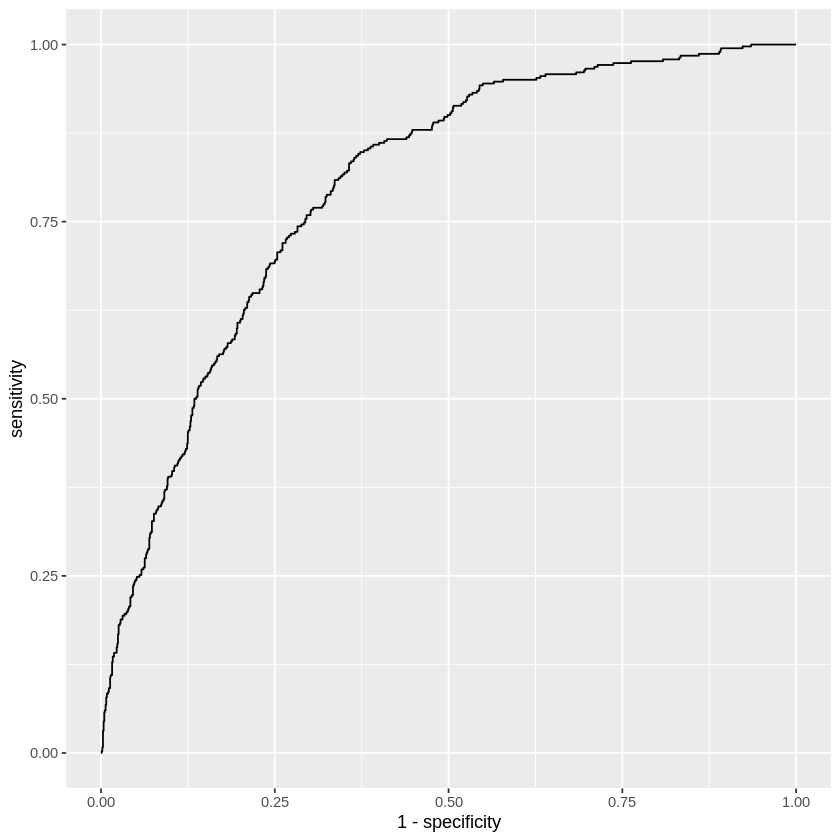

In [ ]:
# Load necessary packages
library(pROC)
library(ggplot2)

# Create ROC curve and calculate AUC for validation set
roc_obj <- roc(validate$CLAIM, validation_preds)
ggroc(roc_obj, legacy.axes = TRUE)
auc(roc_obj)

In [ ]:
install.packages("smotefamily")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’




In [ ]:
library(smotefamily)

In [ ]:


# Oversample training set
train_oversampled <- SMOTE(CLAIM ~ ., train_no_na, k = 5, perc.over = 200, perc.under = 100)


ERROR: ignored

In [ ]:
# Load necessary package
library(DMwR)

# Oversample training set
train_oversampled <- SMOTE(CLAIM ~ ., train_no_na, k = 5, perc.over = 200, perc.under = 100)

ERROR: ignored

In [ ]:
# Fit logistic regression model to oversampled training data
model_oversampled <- glm(CLAIM ~ ., data = train_oversampled, family = binomial)

# View model summary
summary(model_oversampled)

ERROR: ignored

In [ ]:
# Predict outcomes for validation set using the logistic regression model
validation_preds_oversampled <- predict(model_oversampled, newdata = validate, type = "response")
validation_preds_oversampled_class <- ifelse(validation_preds_oversampled > 0.5, "Yes", "No")

# Create confusion matrix for validation set
table(validation_preds_oversampled_class, validate$CLAIM)


ERROR: ignored

In [ ]:

# Create a ROC curve plot using the validation dataset
roc_val <- roc(validate$CLAIM, predict(model_oversampled, newdata = validate, type = "response"))
plot(roc_val, main = "ROC Curve for Logistic Regression Model (Validation)", col = "blue")
# Calculate AUC for the ROC curve
auc(roc_val)

ERROR: ignored